# Subsetting to only trophoblast barcodes based on unbiased clustering and RNA labels

In [1]:
# Load libraries
import pandas as pd 
import scanpy as sc
import numpy as np
import scipy.sparse

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0


In [3]:
# Define variables
cellatac_outdir = '/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/all_cells_analysis/results200k_sampleB/'
outdir = '/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/all_cells_analysis/downstream_analysis/'
experiment_prefix = 'multiome_only_MFI_prelim_all_cells'


In [4]:
# load object with gene activities
gene_adata = sc.read(outdir + experiment_prefix + "_ATAC.geneScores.h5ad")
gene_adata

AnnData object with n_obs × n_vars = 52798 × 8936
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology', '10_Tcells', '15_Tcells', '20_SCT', '19.1_Endo (m)', '17_NK', '3_dS2', '1_VCT', '0_dS1', '4_Tcells', '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1', '12_F1', '2_dNK2', '21_dS3', '27_DC1', '13_EVT', '24_dNKp', '23_MO', '6_dM2', '8_Tcells', '32_ILC3', '18_HB', '11_dNK3', '28_DC2', '19.2_Endo L', '30_Granulocytes', '22_M3', '25.2_Epi2', '16_EVT', '19.3_Endo (f)', '14.2_PV2', '31_NK CD16', '26_Plasma', '25.1_Epi1', '29_MO', '33_F2', 'max', 'top_prediction'
    var: 'gene_id'
    uns: 'age_colors', 'donor_colors', 'neighbors', 'sample_colors', 'technology_colors', 'tissue_colors', 'top_prediction_colors', 'umap'
    obsm: 'X_cistopic_50', 'X_umap'
 

In [5]:
np.unique(gene_adata.obs['donor'])

array(['Hrv43', 'P13', 'P14'], dtype=object)

In [6]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

### Retrieve barcodes of the multiome samples (6) that made it into the final manifold for RNA and subset to those within multiome samples here

In [10]:
save_path = '/lustre/scratch117/cellgen/team292/aa22/adata_objects/202111_MFI_sc_sn_new_scVI_analysis/'
# read in final object 
adata = sc.read(save_path + 'adata_raw_filtered.h5ad')

In [11]:
# read in final annotation labels
final_annot = pd.read_csv(save_path + 'final_annotation_all_cells_and_nulcei_20211123.csv', index_col=0)
final_annot['cell_type'].value_counts()

dS2               65746
dS1               42586
SCT               28177
VCT               23472
uSMC              17043
dEpi_secretory    16834
dM1               14099
dS3               13197
dNK2              12487
HOFB              10733
dNK1              10450
fF1               10420
PV                 9980
dT_cells           9740
dM2                9221
Endo_M             6877
VCT_p              6679
EVT_1              5289
NK                 5187
iEVT               3676
VCT_CCC            3373
MO                 3050
dNK3               2952
ILC3               2511
EVT_2              2358
T_cells            2126
VCT_fusing         1971
dT_regs            1862
Endo_L             1761
Endo_F             1466
fF2                1396
M3                 1299
B_cells             774
DC                  697
dDC                 694
Plasma              255
Granulocytes        195
dEpi_lumenal        135
eEVT                 28
GC                   19
Name: cell_type, dtype: int64

In [12]:
# subset and assign final annotation labels
adata = adata[final_annot.index,:]
adata.obs['cell_type'] = final_annot.loc[adata.obs_names,'cell_type']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


In [13]:
np.unique(adata.obs['sample'])

array(['FCA7167219', 'FCA7167221', 'FCA7167222', 'FCA7167223',
       'FCA7167224', 'FCA7167226', 'FCA7167230', 'FCA7167231',
       'FCA7167232', 'FCA7196218', 'FCA7196219', 'FCA7196220',
       'FCA7196224', 'FCA7196225', 'FCA7196226', 'FCA7196229',
       'FCA7196231', 'FCA7474062', 'FCA7474063', 'FCA7474064',
       'FCA7474065', 'FCA7474066', 'FCA7474068', 'FCA7474069',
       'FCA7511881', 'FCA7511882', 'FCA7511883', 'FCA7511884',
       'FCA7511885', 'FCA7511886', 'Pla_Camb10691970', 'Pla_Camb10691971',
       'Pla_Camb10691972', 'Pla_Camb10691975', 'Pla_Camb10714918',
       'Pla_Camb10714919', 'Pla_Camb10714920', 'Pla_HDBR10142767',
       'Pla_HDBR10142768', 'Pla_HDBR10142769', 'Pla_HDBR10142770',
       'Pla_HDBR10142863', 'Pla_HDBR10142864', 'Pla_HDBR10142865',
       'Pla_HDBR10701666', 'Pla_HDBR10701667', 'Pla_HDBR10701668',
       'Pla_HDBR10917730', 'Pla_HDBR10917731', 'Pla_HDBR10917733',
       'Pla_HDBR8624430', 'Pla_HDBR8624431', 'Pla_HDBR8715512',
       'Pla_HDBR87

In [14]:
adata.obs

,n_genes,sample,technology,tissue,dev_age,donor,dataset,run,number_of_individuals_multiplexed,batch,percent_mito,n_counts,scrublet_score,scrublet_cluster_score,bh_pval,is_doublet,cell_type
barcode_sample,,,,,,,,,,,,,,,,,
AAACGGGCATTGGCGC-1_FCA7167219,1941,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.090287,5992.0,0.164948,0.112619,0.857143,False,dNK1
AAACGGGTCGCGATCG-1_FCA7167219,1246,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.010213,3525.0,0.050251,0.069505,0.905171,False,dT_cells
AAAGATGAGCAATATG-1_FCA7167219,1516,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.020889,4452.0,0.096774,0.087838,0.905171,False,T_cells
AAAGATGAGTTCGCGC-1_FCA7167219,2099,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.047764,6888.0,0.096774,0.112619,0.857143,False,dNK1
AAAGATGCATGTCGAT-1_FCA7167219,1636,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.024991,5882.0,0.087838,0.072727,0.905171,False,T_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGTCAAGT-1_Pla_Camb10714920,2409,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.007270,5227.0,0.013699,0.014381,0.999631,False,uSMC
TTTGTGTTCTTAGTCT-1_Pla_Camb10714920,4129,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.002532,17379.0,0.102190,0.125000,0.886380,False,SCT
TTTGTTGGTCACAGCG-1_Pla_Camb10714920,3116,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.004499,7779.0,0.036876,0.038067,0.999631,False,HOFB


In [15]:
gene_adata.obs.columns

Index(['cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor',
       'age', 'tissue', 'technology', '10_Tcells', '15_Tcells', '20_SCT',
       '19.1_Endo (m)', '17_NK', '3_dS2', '1_VCT', '0_dS1', '4_Tcells',
       '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1', '12_F1', '2_dNK2', '21_dS3',
       '27_DC1', '13_EVT', '24_dNKp', '23_MO', '6_dM2', '8_Tcells', '32_ILC3',
       '18_HB', '11_dNK3', '28_DC2', '19.2_Endo L', '30_Granulocytes', '22_M3',
       '25.2_Epi2', '16_EVT', '19.3_Endo (f)', '14.2_PV2', '31_NK CD16',
       '26_Plasma', '25.1_Epi1', '29_MO', '33_F2', 'max', 'top_prediction'],
      dtype='object')

In [16]:
np.unique(gene_adata.obs['cellatac_code'])

array(['06', '07', '08', '09', '10', '11'], dtype=object)

In [17]:
np.unique(gene_adata.obs['sample'])

array(['Pla_Camb10714918_and_40110_Pla_Camb10687914',
       'Pla_Camb10714919_and_40110_Pla_Camb10687915',
       'Pla_Camb10714920_and_40110_Pla_Camb10687916',
       'Pla_HDBR10142863_and_37083_Pla_HDBR10084192',
       'Pla_HDBR10142864_and_37083_Pla_HDBR10084193',
       'Pla_HDBR10142865_and_37083_Pla_HDBR10084194'], dtype=object)

In [18]:
# also assigning RNA-like sample labels
gene_adata.obs['sample_rna_like'] = [elem.split('_and_')[0] for elem in gene_adata.obs['sample']]

In [19]:
gene_adata.obs['barcode_sample_rna_like'] = [idx[3:] + '_' + sample for idx, sample in zip(gene_adata.obs_names,gene_adata.obs['sample_rna_like'])]

In [20]:
# to use RNA-like barcode_sample index
gene_adata.obs['barcode_sample'] = [idx[3:] + '_' + sample for idx, sample in zip(gene_adata.obs_names,gene_adata.obs['sample'])]

In [21]:
# in the ATAC object, assign 'not_in_RNA' labels to those barcodes of the multiome that are not in the RNA atlas in matched RNA samples

# barcodes of the multiome that are in ATAC but haven't made it into the final RNA manifold
barcodes_to_exclude_from_ATAC = []

for sample in np.unique(gene_adata.obs['sample']):
    print(sample)
    multiome_samples = ['Pla_Camb10714918_and_40110_Pla_Camb10687914',
       'Pla_Camb10714919_and_40110_Pla_Camb10687915',
       'Pla_Camb10714920_and_40110_Pla_Camb10687916',
       'Pla_HDBR10142863_and_37083_Pla_HDBR10084192',
       'Pla_HDBR10142864_and_37083_Pla_HDBR10084193',
       'Pla_HDBR10142865_and_37083_Pla_HDBR10084194']
    is_multiome = True if sample in multiome_samples else False
    
    if is_multiome:
        curr_RNA_counterpart = sample.split('_and_')[0]
        print('multiome sample', sample, 'with RNA counterpart', curr_RNA_counterpart)
        
        print('number of barcodes in ATAC counterpart:', len(gene_adata[gene_adata.obs['sample'] == sample].obs['barcode_sample']))
        print('number of barcodes in RNA counterpart:', len(adata[adata.obs['sample'] == curr_RNA_counterpart].obs_names))
        
        # making our atac barcodes look like rna
        atac_barcodes_rn_like = list(gene_adata[gene_adata.obs['sample'] == sample].obs['barcode_sample'])
        atac_barcodes_rn_like = [elem[:35] for elem in atac_barcodes_rn_like] # removing part with '_and_...'
        
        # barcodes of the multiome that are in ATAC but haven't made it into the final RNA manifold
        multiome_barcodes_not_shared = list(set(atac_barcodes_rn_like) - set(adata[adata.obs['sample'] == curr_RNA_counterpart].obs_names))
        
        multiome_barcodes_shared = list(set(atac_barcodes_rn_like) & set(adata[adata.obs['sample'] == curr_RNA_counterpart].obs_names))
        
        print('multiome_barcodes_not_shared:',len(multiome_barcodes_not_shared))
        print('multiome_barcodes_shared:',len(multiome_barcodes_shared),'\n')
        
        barcodes_to_exclude_from_ATAC.append(multiome_barcodes_not_shared)    


# flatten list
barcodes_to_exclude_from_ATAC = [item for sublist in barcodes_to_exclude_from_ATAC for item in sublist]

Pla_Camb10714918_and_40110_Pla_Camb10687914
multiome sample Pla_Camb10714918_and_40110_Pla_Camb10687914 with RNA counterpart Pla_Camb10714918
number of barcodes in ATAC counterpart: 5069


/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


number of barcodes in RNA counterpart: 4193
multiome_barcodes_not_shared: 943
multiome_barcodes_shared: 4126 

Pla_Camb10714919_and_40110_Pla_Camb10687915
multiome sample Pla_Camb10714919_and_40110_Pla_Camb10687915 with RNA counterpart Pla_Camb10714919
number of barcodes in ATAC counterpart: 6017
number of barcodes in RNA counterpart: 4922
multiome_barcodes_not_shared: 1333
multiome_barcodes_shared: 4684 

Pla_Camb10714920_and_40110_Pla_Camb10687916
multiome sample Pla_Camb10714920_and_40110_Pla_Camb10687916 with RNA counterpart Pla_Camb10714920
number of barcodes in ATAC counterpart: 6310
number of barcodes in RNA counterpart: 5118
multiome_barcodes_not_shared: 1470
multiome_barcodes_shared: 4840 

Pla_HDBR10142863_and_37083_Pla_HDBR10084192
multiome sample Pla_HDBR10142863_and_37083_Pla_HDBR10084192 with RNA counterpart Pla_HDBR10142863
number of barcodes in ATAC counterpart: 7352
number of barcodes in RNA counterpart: 6011
multiome_barcodes_not_shared: 1538
multiome_barcodes_shared:

In [22]:
len(barcodes_to_exclude_from_ATAC)

11974

In [23]:
# additionally, to give more exact annotations of inv troph, let's get the labels of donor P13 trophoblast nuclei from P13-only analysis
# and overwrite other lables (from all donors analysis)

save_path_P13 = '/lustre/scratch117/cellgen/team292/aa22/adata_objects/202007_snRNA-seq_MFI/snRNA_seq_MFI_202007_adatas/202012_FINAL_reanalysis_with_souporcell_deconvolution_common_variants/donor_P13_all_samples_analysis_202110/'
adata_troph_P13 = sc.read(save_path_P13 + 'adata_P13_scVI_analysed_corr_by_sample_SN_and_multiome_trophoblast_v5_final.h5ad')
adata_troph_P13 # final labels of all troph in 'final_annot_all_troph_corrected'


AnnData object with n_obs × n_vars = 37675 × 29058
    obs: 'n_genes', 'donor', 'tissue_block', 'age', 'sample', 'percent_mito', 'n_counts', 'dataset', 'technique', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'batch', 'is_doublet', 'barcode_sample_copy', 'barcode', 'souporcell_assignment', 'inter_ind_doublet', 'S_score', 'G2M_score', 'phase', 'annotation_prev', 'louvain', 'is_doublet_propagate', 'origin_M_F', 'annotation_prev_or_removed', 'inv_troph_labels_initial', 'louvain_scvi_n_latent_8', 'final_annot_inv_troph', 'louvain_scvi_troph_rest', 'final_annot_all_troph', 'final_annot_inv_troph_corrected', 'final_annot_all_troph_corrected'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'genome-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'genome-5', '

In [24]:
# remove the '_and_...' part from barcode_sample here
adata_troph_P13.obs.index = [idx.split('_and_')[0] if '_and_' in idx else idx for idx in adata_troph_P13.obs.index]

In [25]:
adata_troph_P13.obs

,n_genes,donor,tissue_block,age,sample,percent_mito,n_counts,dataset,technique,scrublet_score,...,is_doublet_propagate,origin_M_F,annotation_prev_or_removed,inv_troph_labels_initial,louvain_scvi_n_latent_8,final_annot_inv_troph,louvain_scvi_troph_rest,final_annot_all_troph,final_annot_inv_troph_corrected,final_annot_all_troph_corrected
ACCTGAAAGGATGGCT-1_Pla_Camb10691970,2595,P13,unknown,8-9_PCW,Pla_Camb10691970,0.002652,3433.483154,snRNA-seq,10X,0.118000,...,0,F,0_none,others,3,troph_rest,"troph_rest,0",SCT,troph_rest,SCT
CTACAGAAGAGGCTGT-1_WSSS_PLA8810751,3291,P13,PU8-9_B2,8-9_PCW,WSSS_PLA8810751,0.000409,3979.873535,snRNA-seq,10X,0.030408,...,0,F,VCT_p,others,2,troph_rest,"troph_rest,1",VCT,troph_rest,VCT
ATTTACCCATGGAACG-1_WSSS_PLA8810750,2387,P13,PU8-9_B2,8-9_PCW,WSSS_PLA8810750,0.000000,3165.444824,snRNA-seq,10X,0.091914,...,0,F,SCT,others,3,troph_rest,"troph_rest,0",SCT,troph_rest,SCT
ACCATTTGTGTCTTCC-1_Pla_Camb10691970,1862,P13,unknown,8-9_PCW,Pla_Camb10691970,0.001475,2897.327393,snRNA-seq,10X,0.074830,...,0,F,0_none,others,4,troph_rest,"troph_rest,0",SCT,troph_rest,SCT
TCATTTGGTCCAGTTA-1_WSSS_PLA8810750,2518,P13,PU8-9_B2,8-9_PCW,WSSS_PLA8810750,0.000900,3417.379150,snRNA-seq,10X,0.047110,...,0,F,iEVT,inv_troph,9,iEVT,iEVT,iEVT,iEVT,iEVT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCTTCTCCCGTAAA-1_WSSS_PLA8810751,2391,P13,PU8-9_B2,8-9_PCW,WSSS_PLA8810751,0.000997,3568.117920,snRNA-seq,10X,0.232955,...,0,F,removed,others,11,troph_rest,"troph_rest,0",SCT,troph_rest,SCT
CGATGCGCAATTGCCA-1_WSSS_PLA8810751,3525,P13,PU8-9_B2,8-9_PCW,WSSS_PLA8810751,0.001118,4057.335693,snRNA-seq,10X,0.025431,...,0,F,VCT,others,2,troph_rest,"troph_rest,1",VCT,troph_rest,VCT
TTACAGCAGGAAACTG-1_Pla_Camb10714920,4764,P13,unknown,8-9_PCW,Pla_Camb10714920_and_40110_Pla_Camb10687916,0.035067,3999.327637,snRNA-seq,10X,0.050289,...,0,F,0_none,inv_troph,9,EVT_2,EVT_2,EVT_2,EVT_2,EVT_2
AGCATCACATATGAAG-1_WSSS_PLA8810750,2431,P13,PU8-9_B2,8-9_PCW,WSSS_PLA8810750,0.001215,3604.964111,snRNA-seq,10X,0.058760,...,0,F,EVT_1,inv_troph,14,EVT_1,EVT_1,EVT_1,EVT_1,EVT_1


In [26]:
adata_troph_P13.obs['final_annot_all_troph_corrected'].value_counts()

SCT           22869
VCT            7560
VCT_p          2000
iEVT           1975
VCT_CCC        1016
EVT_2           883
EVT_1           720
VCT_fusing      523
eEVT             71
GC               58
Name: final_annot_all_troph_corrected, dtype: int64

In [27]:
# also add annotation labels from P13 multiome
gene_adata.obs['annot_multiome_P13'] = [adata_troph_P13.obs.loc[barcode_sample,'final_annot_all_troph_corrected'] if barcode_sample in adata_troph_P13.obs_names else 'NA' for barcode_sample in gene_adata.obs['barcode_sample_rna_like']]


In [28]:
gene_adata.obs['annot_multiome_P13'].value_counts()

NA            46956
SCT            4144
VCT             576
iEVT            416
VCT_p           224
VCT_CCC         162
EVT_2           130
EVT_1           114
GC               34
VCT_fusing       33
eEVT              9
Name: annot_multiome_P13, dtype: int64

In [29]:
gene_adata.obs['annot_multiome'] = [adata.obs.loc[barcode_sample, 'cell_type'] if barcode_sample in adata.obs_names else 'NA' for barcode_sample in gene_adata.obs['barcode_sample_rna_like']]


In [30]:
gene_adata.obs['annot_multiome'].value_counts()

dS2               20463
NA                11974
SCT                5217
dS1                2629
dS3                1609
uSMC               1564
dEpi_secretory     1336
Endo_M             1152
PV                 1136
VCT                 801
iEVT                570
dM2                 556
dNK1                509
dM1                 457
dNK2                364
VCT_p               316
HOFB                269
EVT_1               232
fF1                 215
EVT_2               191
VCT_CCC             178
dT_cells            163
Endo_F              132
dNK3                117
Endo_L              107
ILC3                 84
NK                   83
fF2                  72
VCT_fusing           55
dT_regs              47
MO                   45
dEpi_lumenal         32
B_cells              29
T_cells              28
M3                   24
dDC                  21
DC                   10
eEVT                  4
Plasma                4
Granulocytes          3
Name: annot_multiome, dtype: int64

In [31]:
# in addition, for barcodes from donor P13 overwrite all-donors multiome annotations with more precise donor P13-only annotations
gene_adata.obs['annot_multiome_combined'] = [gene_adata.obs.loc[idx,'annot_multiome_P13'] if gene_adata.obs.loc[idx,'annot_multiome_P13'] != 'NA' else gene_adata.obs.loc[idx,'annot_multiome'] for idx in gene_adata.obs_names]


In [33]:
gene_adata.obs['annot_multiome_combined'].value_counts()

dS2               20462
NA                11875
SCT                5291
dS1                2629
dS3                1609
uSMC               1564
dEpi_secretory     1336
Endo_M             1152
PV                 1136
VCT                 786
iEVT                565
dM2                 556
dNK1                509
dM1                 457
dNK2                364
VCT_p               295
HOFB                269
EVT_2               223
fF1                 215
EVT_1               207
VCT_CCC             202
dT_cells            163
Endo_F              132
dNK3                117
Endo_L              107
ILC3                 84
NK                   83
fF2                  72
VCT_fusing           52
dT_regs              47
MO                   45
GC                   34
dEpi_lumenal         32
B_cells              29
T_cells              28
M3                   24
dDC                  21
DC                   10
eEVT                  9
Plasma                4
Granulocytes          3
Name: annot_mult

In [29]:
# to better distinguish predictions from Vento-Tormo dataset
colors_VT = ['#C1B4A7','#E8D6E0','#40ab5d','#F7B5A4',
                 '#d8e7a4','#2ECCFA','#39728C','#FA5858','#E9A1C7',
                 '#B40486','#004529','#C49A6C','#9255a0', '#58595B', '#A3A8AD',
             
                 '#F6D8CE','#633A6D','#C7E0BD','#49ABC8', '#E7C949', 
             
             #'#F7F297', '#af9e56',
                 '#ED1B64','#E59C24','#C2E8F6','#677EB2',#'#73FDD6', 
             '#BC3122', '#771A15',
                 '#E6C6F7','#CEE3F6','#CECEF6','#677EB2','#6363A5','#63A585',
                 #'#246D66',
             '#9B8579']

... storing 'sample_rna_like' as categorical
... storing 'annot_multiome_P13' as categorical
... storing 'annot_multiome' as categorical
... storing 'annot_multiome_combined' as categorical


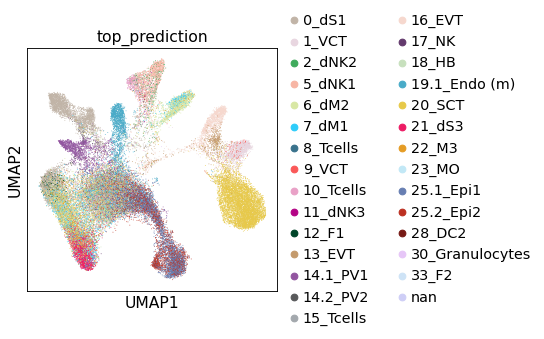

In [30]:
sc.pl.umap(gene_adata, color = ['top_prediction'], ncols = 2, wspace = 0.4, 
            #save = "_noharmony.pdf",
           palette = colors_VT
          )

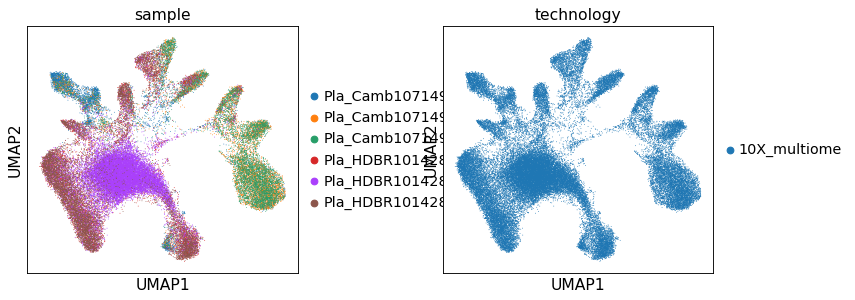

In [31]:
sc.pl.umap(gene_adata, color = ['sample','technology'], ncols = 2, wspace = 0.4,
          )

In [32]:
gene_adata.obs['is_in_matched_multiome'] = ['no' if barcode_sample in barcodes_to_exclude_from_ATAC else 'yes' for barcode_sample in gene_adata.obs['barcode_sample']]
gene_adata.obs['is_in_matched_multiome'] = ['NA' if sample not in ['Pla_Camb10714918_and_40110_Pla_Camb10687914',
       'Pla_Camb10714919_and_40110_Pla_Camb10687915',
       'Pla_Camb10714920_and_40110_Pla_Camb10687916',
       'Pla_HDBR10142863_and_37083_Pla_HDBR10084192',
       'Pla_HDBR10142864_and_37083_Pla_HDBR10084193',
       'Pla_HDBR10142865_and_37083_Pla_HDBR10084194'] else elem for sample,elem in zip(gene_adata.obs['sample'],gene_adata.obs['is_in_matched_multiome'])]

... storing 'is_in_matched_multiome' as categorical


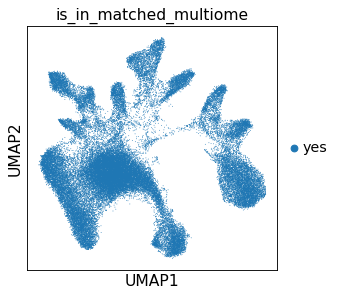

In [33]:
sc.pl.umap(gene_adata, color = ['is_in_matched_multiome'], ncols = 2, wspace = 0.4)

In [34]:
colors_final = ['#e3cee4', # B cells
                '#d6d4eb', # DC aka DC from blood (DC2)
                '#d895ea', # EVT_1
                '#9f6bac', # EVT_2
                '#b9a96b', # Endo_F
                '#f8f4a8', # Endo_L
                '#eacf68', # Endo_M
                #'#DBC7DE', # GC
                '#7673ae', # Granulocytes
                '#69b4ce', # HOFB
                '#497c76', # ILC3
                '#cbebf6', # M3
                '#7a8dbb', # MO
                'lightgrey', # NA
                '#7aaf93', # NK aka NK from blood
                '#6b6a6b', # PV
                'yellow', # Plasma - need to find another color
                '#eb5376', # SCT
                '#f8e6df', # T_cells (blood)
                '#ecdbe5', # VCT
                '#e7a3c8', # VCT_CCC
                '#b53279', # VCT_fusing
                '#e96db3', # VCT_p
                '#d5e7f7', # dDC aka DC1 (decidual)
                '#863829', # dEpi_lumenal
                '#c35338', # dEpi_secretory
                '#588198', # dM1
                '#66cef6', # dM2
                '#deeab1', # dNK1
                '#63b472', # dNK2
                '#2d563c', # dNK3
                '#c9bdb2', # dS3
                '#f5c785', # dS2
                '#eaa944', # dS3
                '#d7587b', # dT_cells
                '#B85E52', # dT_regs
                '#FF1200', # eEVT
                '#cba77e', # fF1
                '#a7958c', # fF2
                '#510058', # iEVT
                '#f37a73', # uSMC
               ]

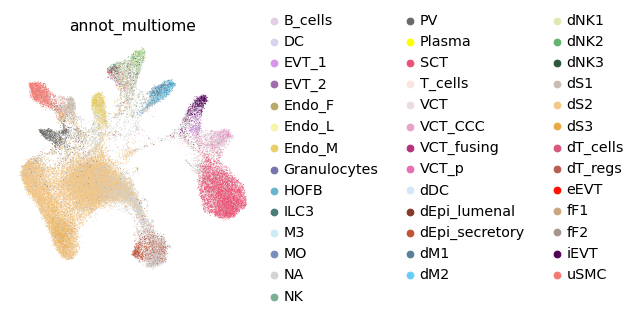

In [41]:
sc.pl.umap(gene_adata, color = ['annot_multiome'], ncols = 2, wspace = 0.4, palette=colors_final,
           frameon=False,
          save = '_multiome_annot.pdf')

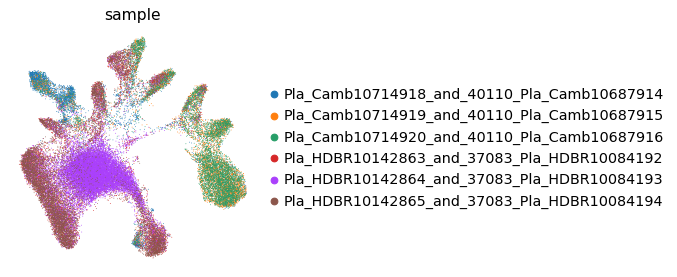

In [42]:
sc.pl.umap(gene_adata, color = ['sample'], 
           frameon=False,
          save = '_sample.pdf'
           #ncols = 2, wspace = 0.4, palette=colors_final
          )

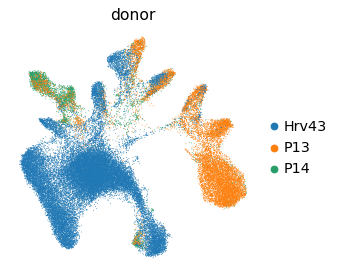

In [43]:
sc.pl.umap(gene_adata, color = ['donor'], 
           frameon=False,
          save = '_donor.pdf'
           #ncols = 2, wspace = 0.4, palette=colors_final
          )

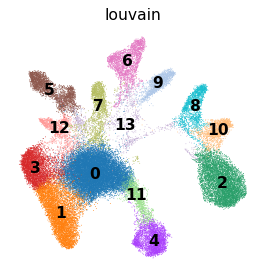

In [44]:
sc.pl.umap(gene_adata, color = ['louvain'], legend_loc='on data',
          frameon=False, save = '_louvain.pdf')

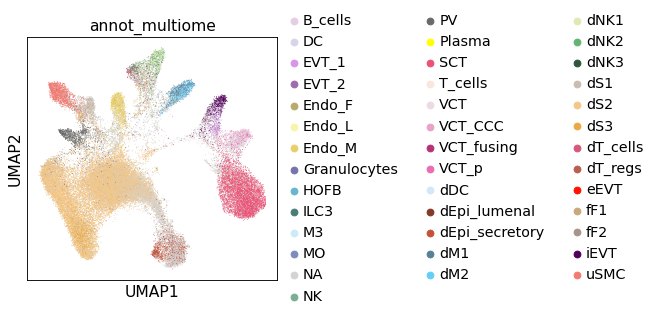

In [35]:
sc.pl.umap(gene_adata, color = ['annot_multiome'], ncols = 2, wspace = 0.4, palette=colors_final)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


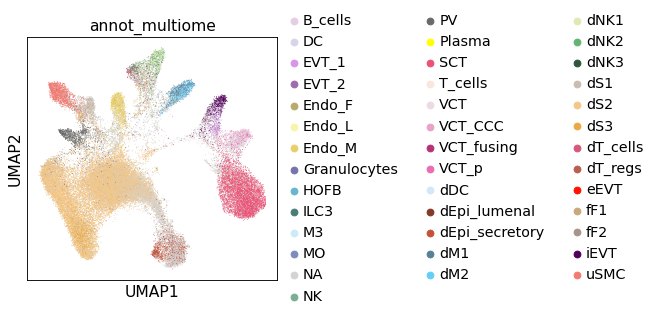

In [36]:
sc.pl.umap(gene_adata[gene_adata.obs['is_in_matched_multiome'] == 'yes'], color = ['annot_multiome'], 
           ncols = 2, wspace = 0.4, #palette=colors_final
          )

In [37]:
gene_adata[gene_adata.obs['annot_multiome'] == 'GC']

View of AnnData object with n_obs × n_vars = 0 × 8936
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology', '10_Tcells', '15_Tcells', '20_SCT', '19.1_Endo (m)', '17_NK', '3_dS2', '1_VCT', '0_dS1', '4_Tcells', '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1', '12_F1', '2_dNK2', '21_dS3', '27_DC1', '13_EVT', '24_dNKp', '23_MO', '6_dM2', '8_Tcells', '32_ILC3', '18_HB', '11_dNK3', '28_DC2', '19.2_Endo L', '30_Granulocytes', '22_M3', '25.2_Epi2', '16_EVT', '19.3_Endo (f)', '14.2_PV2', '31_NK CD16', '26_Plasma', '25.1_Epi1', '29_MO', '33_F2', 'max', 'top_prediction', 'sample_rna_like', 'barcode_sample_rna_like', 'barcode_sample', 'annot_multiome_P13', 'annot_multiome', 'annot_multiome_combined', 'is_in_matched_multiome'
    var: 'gene_id'
    uns: 'age_c

In [38]:
adata[adata.obs['cell_type'] == 'GC'].obs['sample'].value_counts()

Pla_Camb10691971    7
Pla_Camb10691970    6
WSSS_PLA8764122     3
WSSS_PLA8764121     1
WSSS_PLA8810750     1
WSSS_PLA8810751     1
Name: sample, dtype: int64

In [39]:
adata[adata.obs['cell_type'] == 'GC'].obs['technology'].value_counts()

10X_3'_snRNA-seq    19
Name: technology, dtype: int64

In [38]:
# cluster apart troph populations here
sc.tl.louvain(gene_adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:07)


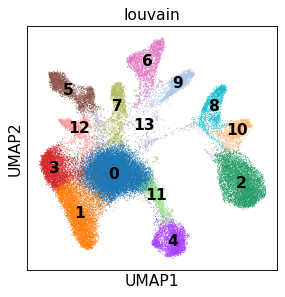

In [42]:
sc.pl.umap(gene_adata, color = ['louvain'], legend_loc='on data')

In [43]:
# this many barcodes are not in RNA counterpart so we will disregard them
len(barcodes_to_exclude_from_ATAC)

11974

In [69]:
barcodes_to_exclude_from_ATAC

['GTTAATGTCTTGGATA-1_Pla_Camb10714918',
 'AATTAGGCACCCACCT-1_Pla_Camb10714918',
 'CCATCATGTGCCTCAC-1_Pla_Camb10714918',
 'TGGTCATAGGTCGAGG-1_Pla_Camb10714918',
 'GGTGTCCAGGTAAGGC-1_Pla_Camb10714918',
 'AACCTCCTCACTAATG-1_Pla_Camb10714918',
 'TGTAAGTGTGTTTGAG-1_Pla_Camb10714918',
 'CGGTAACGTGAGCGAA-1_Pla_Camb10714918',
 'TAATTGCCACCAAAGG-1_Pla_Camb10714918',
 'GCCAGGTTCAATACGC-1_Pla_Camb10714918',
 'ATCAGGTTCTTAGGAC-1_Pla_Camb10714918',
 'CCGCAAATCGCCTGTT-1_Pla_Camb10714918',
 'AAGACAAGTAAGCTCA-1_Pla_Camb10714918',
 'ATGTTTGAGGGTTATC-1_Pla_Camb10714918',
 'TAATCACCACCGGTAT-1_Pla_Camb10714918',
 'ACAGGATCATTGCAGC-1_Pla_Camb10714918',
 'ACAGTATGTTGTAACG-1_Pla_Camb10714918',
 'CTCCTCACAGCAGGTA-1_Pla_Camb10714918',
 'TATGGGCGTCCTTAGT-1_Pla_Camb10714918',
 'GGAACGGTCTACCTGC-1_Pla_Camb10714918',
 'CGGGTATGTGGGTACT-1_Pla_Camb10714918',
 'CAAATCATCTCAATTC-1_Pla_Camb10714918',
 'CGACAAGCATAATCGT-1_Pla_Camb10714918',
 'AATATCCCAAAGCTAA-1_Pla_Camb10714918',
 'CAGAACCGTCCGCTGT-1_Pla_Camb10714918',


In [44]:
len(set(gene_adata.obs['barcode_sample_rna_like']) & set(barcodes_to_exclude_from_ATAC))

11974

In [45]:
len(set(gene_adata.obs['barcode_sample_rna_like']) - set(barcodes_to_exclude_from_ATAC))

40824

In [46]:
len(gene_adata)

52798

In [47]:
barcodes2keep = list(set(gene_adata.obs['barcode_sample_rna_like']) - set(barcodes_to_exclude_from_ATAC))
len(barcodes2keep)

40824

In [48]:
gene_adata = gene_adata[gene_adata.obs['barcode_sample_rna_like'].isin(barcodes2keep)]
gene_adata

View of AnnData object with n_obs × n_vars = 40824 × 8936
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology', '10_Tcells', '15_Tcells', '20_SCT', '19.1_Endo (m)', '17_NK', '3_dS2', '1_VCT', '0_dS1', '4_Tcells', '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1', '12_F1', '2_dNK2', '21_dS3', '27_DC1', '13_EVT', '24_dNKp', '23_MO', '6_dM2', '8_Tcells', '32_ILC3', '18_HB', '11_dNK3', '28_DC2', '19.2_Endo L', '30_Granulocytes', '22_M3', '25.2_Epi2', '16_EVT', '19.3_Endo (f)', '14.2_PV2', '31_NK CD16', '26_Plasma', '25.1_Epi1', '29_MO', '33_F2', 'max', 'top_prediction', 'sample_rna_like', 'barcode_sample_rna_like', 'barcode_sample', 'annot_multiome_P13', 'annot_multiome', 'annot_multiome_combined', 'is_in_matched_multiome', 'louvain'
    var: 'gene_id'


In [80]:
gene_adata_troph_subset_to_reanalyse = gene_adata[(gene_adata.obs['louvain'].isin(['2','8','10']))
                                                 & (gene_adata.obs['annot_multiome_combined'].isin(['EVT_1', 'EVT_2', 'GC', 'SCT',
       'VCT', 'VCT_CCC', 'VCT_fusing', 'VCT_p', 'eEVT', 'iEVT']))].copy()

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [81]:
gene_adata_troph_subset_to_reanalyse.obs['annot_multiome_combined'].value_counts()

SCT           5212
VCT            755
iEVT           545
VCT_p          282
EVT_2          214
EVT_1          197
VCT_CCC        190
VCT_fusing      48
GC              29
eEVT             9
Name: annot_multiome_combined, dtype: int64

In [82]:
np.unique(gene_adata_troph_subset_to_reanalyse.obs['annot_multiome_combined'])

array(['EVT_1', 'EVT_2', 'GC', 'SCT', 'VCT', 'VCT_CCC', 'VCT_fusing',
       'VCT_p', 'eEVT', 'iEVT'], dtype=object)

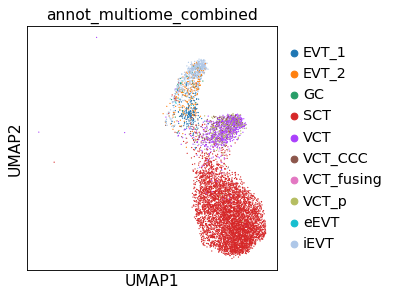

In [83]:
sc.pl.umap(gene_adata_troph_subset_to_reanalyse, color = ['annot_multiome_combined'], size=5, 
           #palette='Set2'
          )

In [84]:
gene_adata_troph_subset_to_reanalyse.var_names

Index(['SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4', 'ISG15',
       'AGRN', 'AGRN-1', 'RP11-465B22.3',
       ...
       'U82695.9', 'ATP2B3', 'BCAP31', 'ABCD1', 'MECP2', 'FLNA', 'UBL4A',
       'G6PD', 'G6PD-1', 'MPP1'],
      dtype='object', name='gene_name', length=8936)

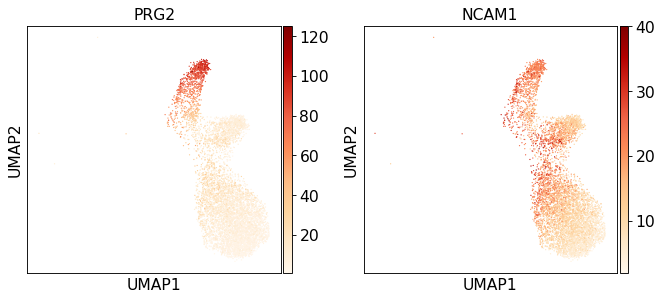

In [90]:
sc.pl.umap(gene_adata_troph_subset_to_reanalyse, color = ['PRG2','NCAM1'], cmap='OrRd',
           size=5)

In [91]:
gene_adata_troph_subset_to_reanalyse

AnnData object with n_obs × n_vars = 7481 × 8936
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology', '10_Tcells', '15_Tcells', '20_SCT', '19.1_Endo (m)', '17_NK', '3_dS2', '1_VCT', '0_dS1', '4_Tcells', '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1', '12_F1', '2_dNK2', '21_dS3', '27_DC1', '13_EVT', '24_dNKp', '23_MO', '6_dM2', '8_Tcells', '32_ILC3', '18_HB', '11_dNK3', '28_DC2', '19.2_Endo L', '30_Granulocytes', '22_M3', '25.2_Epi2', '16_EVT', '19.3_Endo (f)', '14.2_PV2', '31_NK CD16', '26_Plasma', '25.1_Epi1', '29_MO', '33_F2', 'max', 'top_prediction', 'barcode_sample', 'annot_multiome_P13', 'annot_multiome', 'sample_rna_like', 'barcode_sample_rna_like', 'annot_multiome_combined', 'is_in_matched_multiome', 'louvain', 'annot_multiome_copy_for_co

In [92]:
gene_adata_troph_subset_to_reanalyse.obs['annot_multiome_combined'].value_counts()

SCT           5212
VCT            755
iEVT           545
VCT_p          282
EVT_2          214
EVT_1          197
VCT_CCC        190
VCT_fusing      48
GC              29
eEVT             9
Name: annot_multiome_combined, dtype: int64

In [93]:
gene_adata_troph_subset_to_reanalyse.obs['sample'].value_counts()

Pla_Camb10714920_and_40110_Pla_Camb10687916    3470
Pla_Camb10714919_and_40110_Pla_Camb10687915    3423
Pla_Camb10714918_and_40110_Pla_Camb10687914     450
Pla_HDBR10142863_and_37083_Pla_HDBR10084192      60
Pla_HDBR10142864_and_37083_Pla_HDBR10084193      43
Pla_HDBR10142865_and_37083_Pla_HDBR10084194      35
Name: sample, dtype: int64

In [94]:
pd.DataFrame(gene_adata_troph_subset_to_reanalyse.obs.index)

,0
0,09-AAACAGCCACTCGCTC-1
1,09-AAACCGGCACAGGAAT-1
2,09-AAACGGATCCACCCTG-1
3,09-AAAGCCCGTGTCACGG-1
4,09-AAAGCTTGTGTTTGTC-1
...,...
7476,08-TCTTAGTTCCAAACAC-1
7477,08-TGCTCACTCCTCACTA-1
7478,08-TGTGTTAAGTAAGAAC-1
7479,08-TTATTGCTCCTAAATG-1


In [95]:
# finally saving barcodes for Stijn
pd.DataFrame(gene_adata_troph_subset_to_reanalyse.obs.index).to_csv(outdir + '20220111_troph_barcodes_multiome_only_for_Stijn.csv')

In [96]:
outdir

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/all_cells_analysis/downstream_analysis/'

In [30]:
barcodes_troph = pd.read_csv(outdir + '20220111_troph_barcodes_multiome_only_for_Stijn.csv', index_col = 0)

#### 17.01.2022: resaving this table with labels from 'annot_multiome_combined' to use the "ground truth" (labels of annotations from RNA counterpart of these multiome nuclei) labels for peak calling in cellatac
barcodes_troph

In [31]:
# 17.01.2022: resaving this table with labels from 'annot_multiome_combined' to use these labels for peak calling in cellatac
barcodes_troph

,0
0,09-AAACAGCCACTCGCTC-1
1,09-AAACCGGCACAGGAAT-1
2,09-AAACGGATCCACCCTG-1
3,09-AAAGCCCGTGTCACGG-1
4,09-AAAGCTTGTGTTTGTC-1
...,...
7476,08-TCTTAGTTCCAAACAC-1
7477,08-TGCTCACTCCTCACTA-1
7478,08-TGTGTTAAGTAAGAAC-1
7479,08-TTATTGCTCCTAAATG-1


In [35]:
pd.DataFrame(gene_adata.obs.loc[barcodes_troph['0'],'annot_multiome_combined']).to_csv(outdir + '20220117_troph_barcodes_multiome_only_for_Stijn_annotations_for_cellatac.csv',
                                                                                      sep='\t')

In [36]:
outdir

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/all_cells_analysis/downstream_analysis/'

In [39]:
np.unique(gene_adata.obs.loc[barcodes_troph['0'],'annot_multiome_combined'], return_counts=True)

(array(['EVT_1', 'EVT_2', 'GC', 'SCT', 'VCT', 'VCT_CCC', 'VCT_fusing',
        'VCT_p', 'eEVT', 'iEVT'], dtype=object),
 array([ 197,  214,   29, 5212,  755,  190,   48,  282,    9,  545]))